# Trabajo Práctico 1: Uso de R en Ciencia de Datos
Para la materia: Topicos avanzados en minería de datos - C2 2024

**Alumno:** [Joaquin Caporalini](mailto:joaquicaporalini@gmail.com)

**Docente:** [Pablo Granitto](mailto:granitto@cifasis-conicet.gov.ar)

## Diagonal

Se requiere definir un generador, que se nombra `generar_datos_diagona(...)`, para dos clases de dimensión $ d $, donde los puntos de entrada son generados siguiendo distribuciones Gaussianas (normales) multidimensionales.

### Descripción de las Clases:
- **Clase 1**:
   - Los puntos de la clase 1 son generados aleatoriamente siguiendo una **distribución normal** multidimensional, con:
     - **Centro en el punto (1, 1, 1, ..., 1)**, es decir, un vector de longitud $ d $, donde todas las coordenadas son 1.
     - **Matriz de covarianza diagonal**: Esto significa que todas las variables (las coordenadas) son independientes entre sí. En una Gaussiana, la matriz de covarianza define cómo de dispersos están los puntos y si las variables están correlacionadas. Una matriz diagonal indica que las variables no están correlacionadas.
     - **Desviación estándar**: La desviación estándar de cada coordenada es $ C \times \sqrt{d}$, donde $ C $ es un factor que controla la dispersión de los puntos.
   
- **Clase 0**:
   - Los puntos de la clase 0 tienen las mismas características que los de la clase 1 (distribución normal multidimensional, matriz de covarianza diagonal), pero el centro está en el punto **(-1, -1, -1, ..., -1)**.

### Parámetros:
1. **d**: Es la cantidad de dimensiones del espacio, es decir, cuántas coordenadas tiene cada punto.
2. **n**: Es la cantidad total de puntos que se deben generar. De estos, la mitad (n/2) debe pertenecer a la clase 1 y la otra mitad a la clase 0.
3. **C**: Es un número real que ajusta la dispersión (desviación estándar) de las coordenadas.

### Salida:

Genera un **dataframe** con $ n $ filas y $ d+1 $ columnas. Las primeras $ d $ columnas corresponden a las coordenadas de los puntos en el espacio $ d $-dimensional. La última columna (la $ d+1 $) corresponde a la clase del punto (0 o 1).


In [83]:
generar_por_clase <- function(nombre, valor, dimension, cant, c){
  # Se generan todos los números para luego se agrupan y tabulan en una matriz
  datos <- matrix(rnorm(dimension * cant, mean = valor, sd = c * sqrt(dimension)), ncol = dimension);

  # Se agregan la categoria a cada punto
  return(cbind(datos, rep(nombre, cant)));
}

generar_datos_diagonal <- function(dimension, cant, c){
  # Para que tengamos misma cantdad de puntos por categoria
  cantPorClase <- floor(cant / 2);

  # Generamos cada categoría
  clase1 <- generar_por_clase(1,  1, dimension, cantPorClase, c);
  clase2 <- generar_por_clase(0, -1, dimension, cantPorClase, c);

  # Los unimos y transformamos en un dataFrame
  dataFrame <- as.data.frame(rbind(clase1, clase2));

  # Renomnramos las columnas para que representen cada componente y la clase
  colnames(dataFrame) <- c(paste0("i_", 1:dimension), "Clase")

  #
  dataFrame$Clase <- as.factor(dataFrame$Clase)
  return(dataFrame);
}

## Espirales anidadeas

El requerimiento exije la definición de un generador de nombre `generar_datos_espirales(...)` de puntos dentro de un círculo en el plano $x-y$ (cartesianas) y luego la clasificación de estos puntos en dos clases, basándose en su posición en coordenadas polares.

Los puntos son generados siguiendo una **distribución uniforme** en el plano cartesiano tomando valores aleatorios que caen dentro del círculo centrado en el origen y radio unitario, es decir, que los $x$ e $y$ cumplen con la condición $ x^2 + y^2 \leq 1 $

  

### Descripción de las clases:
Los puntos se clasifican en funsión de su posición en coordenadas polares con respecto a dos curvas definidas por las ecuaciones:
- $ r = \frac{\theta}{4\pi} $
- $ r = \frac{\theta + \pi}{4\pi} $

#### Clase 0:
Los puntos que están **entre** estas dos curvas pertenecen a la **clase 0**. Esto significa que si el radio $r$ de un punto está entre las dos curvas, el punto pertenece a la clase 0. En otras palabras, un punto es clase 0 si:
  $$
  \frac{\theta}{4\pi} \leq r \leq \frac{\theta + \pi}{4\pi}
  $$

#### Clase 1:
Los puntos que **no están entre** estas dos curvas pertenecen a la **clase 1**.

### Parámetros:
1. **n**: Es la cantidad total de puntos que se deben generar. De estos, la mitad (n/2) debe pertenecer a la clase 1 y la otra mitad a la clase 0.

### Salida
Genera un **dataframe** con $ n $ filas y tres columnas. Las primeras columnas corresponden a las coordenadas en el plano de los puntos. La última columna corresponde a la clase del punto (0 o 1).

In [84]:
# ADVERTENCIA: Esta función solo verifica para theta \in [0,4pi]
esta_entre_curvas <- function(rho, theta){
  # rho  : largo
  # thete: angulo

  if (rho > 1){
    return (FALSE);
  }

  # 0 <= theta < 2pi
  rho_00 <- theta / (4 * pi); #min
  rho_10 <- (theta + pi) / (4 * pi); #max
  # 2pi <= theta < 4pi
  rho_01 <- (theta + 2 * pi) / (4 * pi); #min
  rho_11 <- (theta + 3 * pi) / (4 * pi); #max

  return((rho_00 < rho && rho < rho_10) || (rho_01 < rho && rho < rho_11)) ;
}

generar_datos_espirales <- function(cant){
  # Para que tengamos misma cantdad de puntos por categoria
  cantPorClase <- floor(cant / 2);

  cantClase0 = cantPorClase;
  cantClase1 = cantPorClase;

  datos = matrix(ncol = 3)

  while (0 < cantClase0 | 0 < cantClase1){
    theta <- runif(1, min = 0, max= 2 * pi);
    rho   <- sqrt(runif(1,min = 0, max= 1)); # Valores por defecto min:0 max: 1
    # se toma la raiz para ajusta la densidad de los puntos y distribuye uniformemente
    # los puntos en todo el círculo, evitando una concentración mayor
    # de puntos cerca del centro


    x <- cos(theta) * rho;
    y <- sin(theta) * rho;

    if (esta_entre_curvas(rho, theta)){
      if (0 < cantClase0) {
        cantClase0 <- cantClase0 - 1;
        datos <- rbind(datos, c(x, y, 0));
      }
    } else if (0 < cantClase1) {
        cantClase1 <- cantClase1 - 1;
        datos <- rbind(datos, c(x, y, 1));
    }
  }

  dataFrame = as.data.frame(datos[-1, ]);

  colnames(dataFrame) <- c("x", "y", "Clase");

  dataFrame$Clase <- as.factor(dataFrame$Clase);
  return(dataFrame);
}

## Graficar los datos en el plano cartesiano

Se ponen en el plano los puntos pasados como dataframes separando por colores a que **clase** pertenecen.

In [85]:
# Visualizar los puntos
library(ggplot2)

mostrar_plano <- function(dataFrame, titulo){
  ggplot(dataFrame, aes(x = dataFrame[,1], y = dataFrame[,2], color = factor(Clase))) +
    geom_point() +
    scale_color_manual(values = c("1" = "blue", "0" = "red")) +
    labs(title = titulo, x = "X", y = "Y", color = "Clase") +
    theme_minimal()
}



## Generación y muestra de los datos de test y entrenamiento

Se generarán 4 conjuntos de datos, dos generados por`generar_datos_diagonal(...)` y los otros dos por `generar_datos_espirales(...)`. Los dos primeros con 10.000 puntos cada uno compuestos a su vez por un *50%* de representantes de la clase 1 y el otro *50%* por los de la clase 0. Estos dos conjuntos se utilizarán para tests.

Los dos conjuntos restantes tienen una composición identica a los dos primeros solo que con 300 puntos en su interior.

### Datos para usar como casos de test

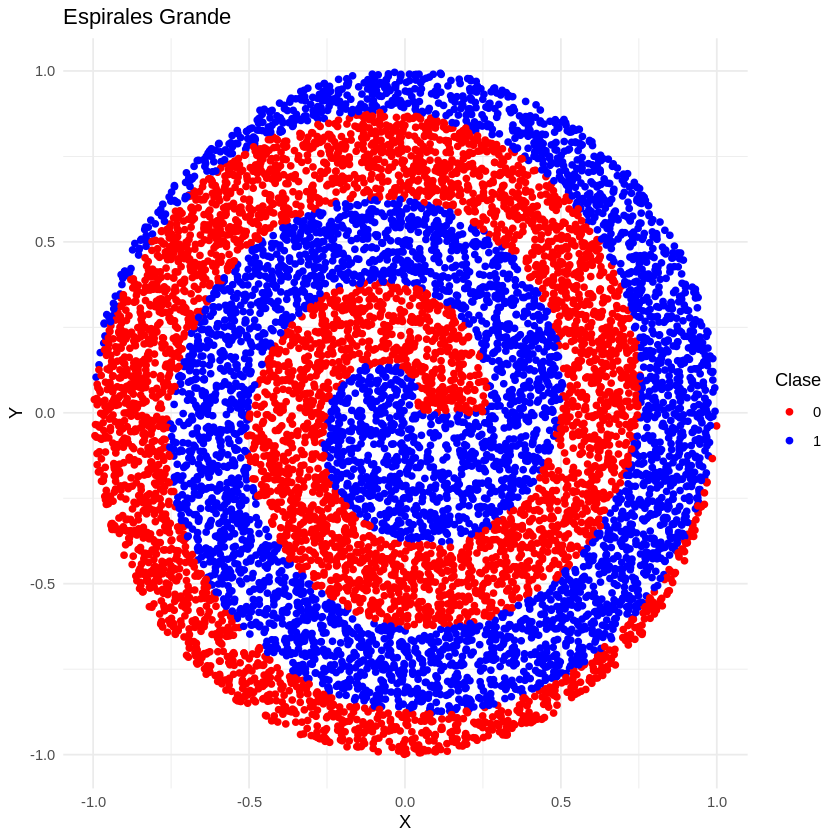

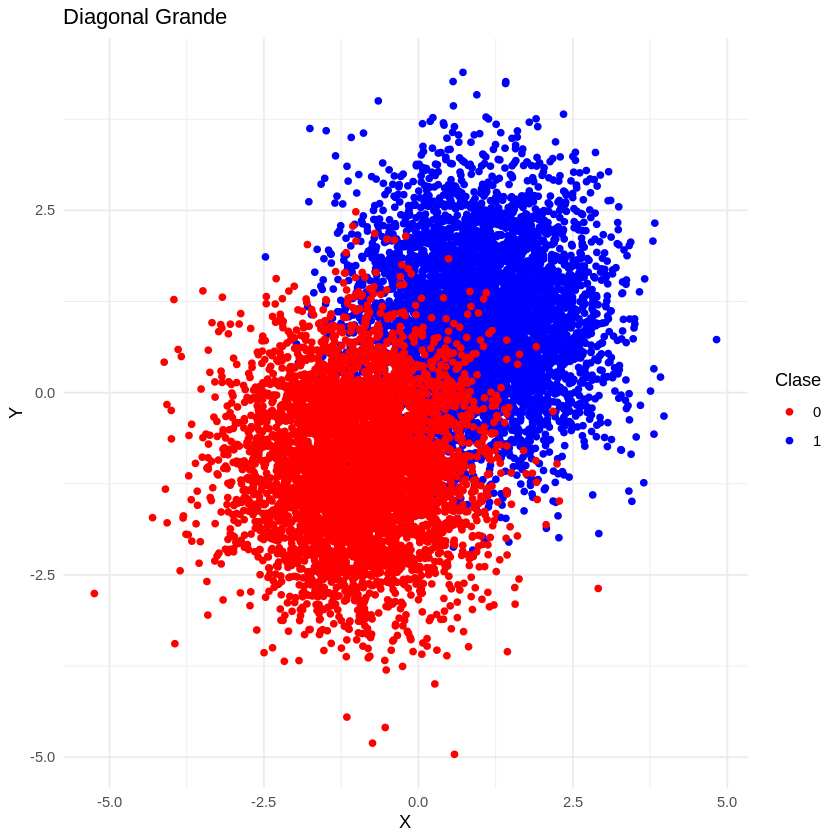

In [86]:
espiralGrande  <- generar_datos_espirales(10000)
mostrar_plano(espiralGrande, "Espirales Grande")

diagonalGrande <- generar_datos_diagonal(2, 10000, 0.7)
mostrar_plano(diagonalGrande, "Diagonal Grande")

### Datos para usar para entrenar

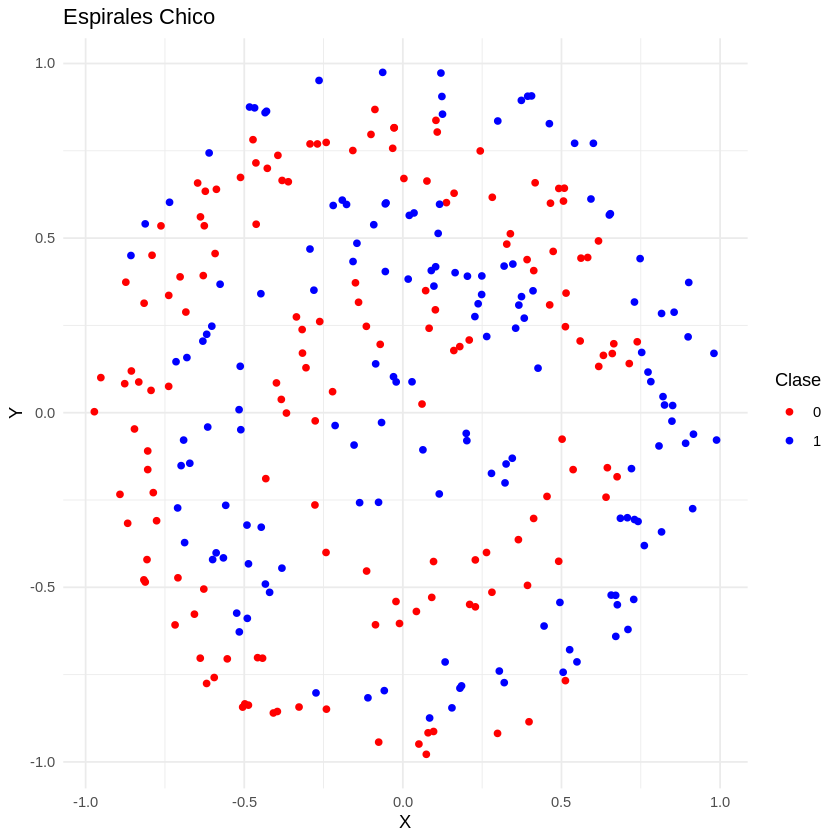

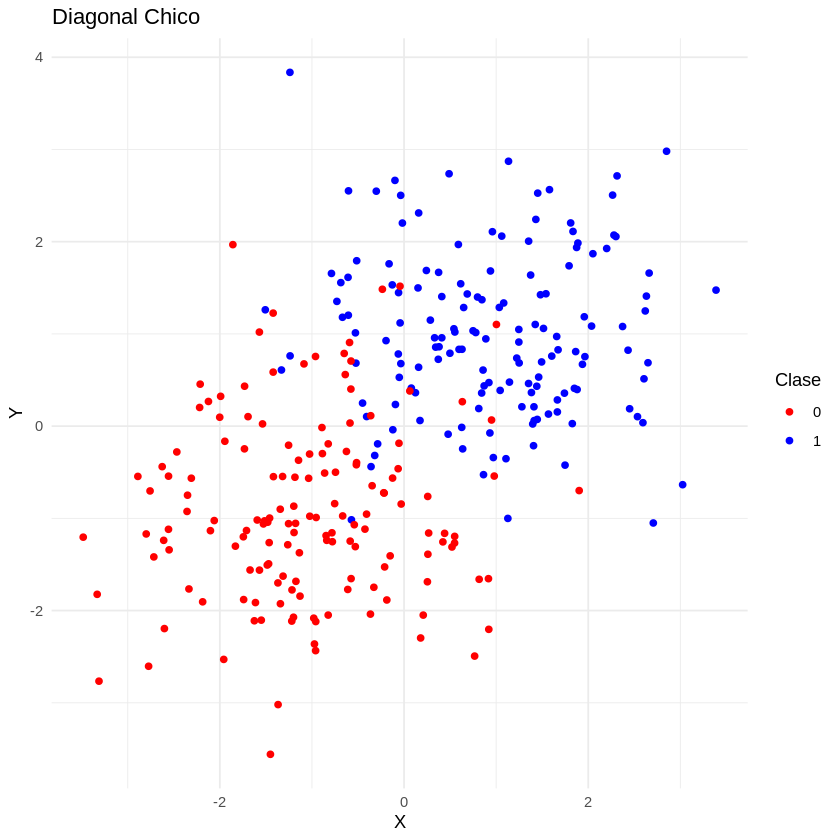

In [87]:
espiralChico  <- generar_datos_espirales(300)
mostrar_plano(espiralChico, "Espirales Chico")

diagonalChico <- generar_datos_diagonal(2, 300, 0.7)
mostrar_plano(diagonalChico, "Diagonal Chico")

## Entrenando modelos y calculando los errores



In [88]:
library(class)
library(rpart)

# Entrenar árbol de desición
entrenar_arbol <- function(datosEntrenamiento){
  return (rpart(Clase ~ . , data=datosEntrenamiento, method = "class"))
}

# Clasificar por k vecinos
entrenar_k_vecinos <- function(datosEntrenamiento, datosTest, vecinos=5, classRow = 3){
  predicciones <- knn(datosEntrenamiento[,-classRow], test = datosTest[,-classRow], cl = datosEntrenamiento[,classRow], k = vecinos)
  return (table(Real = datosTest[,classRow], Predicho = predicciones))
}

# Generar la matriz de confusión para árboles de desición
matriz_confusion <- function(modelo, datosTest, classRow = 3){
  predicciones <- predict(modelo,datosTest[,-classRow], type = "class")
  return (table(Real = datosTest[,classRow], Predicho = predicciones))
}

# Calcular el error a partir de la matriz de confusión
calcular_error <- function(matrizConfusion){
  # El Accuracy nos da sobre el total de puntos todos que se clasificaron bien.
  # para calcular el error se debe buscar el complemento.
  return (1 - sum(diag(matrizConfusion)) / sum(matrizConfusion))
}

In [89]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [90]:
library(caret)

cross_validation_arboles <- function(datos, bolsas=5){

  folds <- createFolds(datos$Clase, k = bolsas)
  errors <- c()

  for (fold in folds){
    train <- entrenar_arbol(datos[-fold,])
    matrizConfusion <- matriz_confusion(train, datos[fold,])
    errors <- c(errors, calcular_error(matrizConfusion))
  }

  return (mean(errors))
}

cross_validation_k_vecinos <- function(datos, vecinos=5, bolsas=5){
  folds <- createFolds(datos$Clase, k = 5)
  errors <- c()

  for (fold in folds){
    matrizConfusion <- entrenar_k_vecinos(datos[-fold,], datos[fold,], vecinos)
    errors <- c(errors, calcular_error(matrizConfusion))
  }

  return (mean(errors))
}


### Arboles

In [91]:
modelo_arbol_diagonal <- entrenar_arbol(diagonalChico)
matriz_confusion_diagonal_arboles <- matriz_confusion(modelo_arbol_diagonal, diagonalGrande)
error_arbol_diagonal <- calcular_error(matriz_confusion_diagonal_arboles)

modelo_arbol_espiral <- entrenar_arbol(espiralChico)
matriz_confusion_espiral_arboles <- matriz_confusion(modelo_arbol_espiral, espiralGrande)
error_arbol_espiral <- calcular_error(matriz_confusion_espiral_arboles)

### k-vecinos

#### vecinos = 3

In [92]:
matriz_confusion_diagonal_3_vecinos <- entrenar_k_vecinos(diagonalChico, diagonalGrande,3)
error_3_vecinos_diagonal <- calcular_error(matriz_confusion_diagonal_3_vecinos)

matriz_confusion_espiral_3_vecinos <- entrenar_k_vecinos(espiralChico, espiralGrande,3)
error_3_vecinos_espiral <- calcular_error(matriz_confusion_espiral_3_vecinos)

#### vecinos = 5

In [93]:
matriz_confusion_diagonal_5_vecinos <- entrenar_k_vecinos(diagonalChico, diagonalGrande)
error_5_vecinos_diagonal <- calcular_error(matriz_confusion_diagonal_5_vecinos)

matriz_confusion_espiral_5_vecinos <- entrenar_k_vecinos(espiralChico, espiralGrande)
error_5_vecinos_espiral <- calcular_error(matriz_confusion_espiral_5_vecinos)

#### vecinos = 7

In [94]:
matriz_confusion_diagonal_7_vecinos <- entrenar_k_vecinos(diagonalChico, diagonalGrande,7)
error_7_vecinos_diagonal <- calcular_error(matriz_confusion_diagonal_7_vecinos)

matriz_confusion_espiral_7_vecinos <- entrenar_k_vecinos(espiralChico, espiralGrande,7)
error_7_vecinos_espiral <- calcular_error(matriz_confusion_espiral_7_vecinos)

#### vecinos = 9

In [95]:
matriz_confusion_diagonal_9_vecinos <- entrenar_k_vecinos(diagonalChico, diagonalGrande,9)
error_9_vecinos_diagonal <- calcular_error(matriz_confusion_diagonal_9_vecinos)

matriz_confusion_espiral_9_vecinos <- entrenar_k_vecinos(espiralChico, espiralGrande,9)
error_9_vecinos_espiral <- calcular_error(matriz_confusion_espiral_9_vecinos)

## interpretando los errores

### Muestra de los errores

In [96]:
cat("Errores de los clasificadores para arboles:\n")
cat("\tdiagonal: ", error_arbol_diagonal, "\n")
cat("\tespiral:  ", error_arbol_espiral, "\n")

cat("\nErrores de los calsificadores para 3 vecinos:\n")
cat("\tdiagonal: ", error_3_vecinos_diagonal,"\n")
cat("\tespiral:  ", error_3_vecinos_espiral, "\n")

cat("\nErrores de los calsificadores para 5 vecinos:\n")
cat("\tdiagonal: ", error_5_vecinos_diagonal,"\n")
cat("\tespiral:  ", error_5_vecinos_espiral, "\n")

cat("\nErrores de los calsificadores para 7 vecinos:\n")
cat("\tdiagonal: ", error_7_vecinos_diagonal,"\n")
cat("\tespiral:  ", error_7_vecinos_espiral, "\n")

cat("\nErrores de los calsificadores para 9 vecinos:\n")
cat("\tdiagonal: ", error_9_vecinos_diagonal,"\n")
cat("\tespiral:  ", error_9_vecinos_espiral, "\n")

  # "Clasificador",  "Diagonal",     "Espiral",
errores_dataFrame <- as.data.frame(matrix(c(
  "Arboles", error_arbol_diagonal, error_arbol_espiral,
  "3-vecinos", error_3_vecinos_diagonal, error_3_vecinos_espiral,
  "5-vecinos", error_5_vecinos_diagonal, error_5_vecinos_espiral,
  "7-vecinos", error_7_vecinos_diagonal, error_7_vecinos_espiral,
  "9-vecinos", error_9_vecinos_diagonal, error_9_vecinos_espiral
  ), ncol=3, byrow=T))

Errores de los clasificadores para arboles:
	diagonal:  0.089 
	espiral:   0.279 

Errores de los calsificadores para 3 vecinos:
	diagonal:  0.086 
	espiral:   0.159 

Errores de los calsificadores para 5 vecinos:
	diagonal:  0.0831 
	espiral:   0.1741 

Errores de los calsificadores para 7 vecinos:
	diagonal:  0.0811 
	espiral:   0.197 

Errores de los calsificadores para 9 vecinos:
	diagonal:  0.0805 
	espiral:   0.2081 


### Calculo y muestra del error con cross validation con 5 *folds*

In [97]:
cat("Errores de los clasificadores para arboles:\n")
cat("\tdiagonal: ", cross_validation_arboles(diagonalChico), "\n")
cat("\tespiral:  ", cross_validation_arboles(espiralChico), "\n")

cat("\nErrores de los calsificadores para 3 vecinos:\n")
cat("\tdiagonal: ", cross_validation_k_vecinos(diagonalChico),"\n")
cat("\tespiral:  ", cross_validation_k_vecinos(espiralChico), "\n")

cat("\nErrores de los calsificadores para 5 vecinos:\n")
cat("\tdiagonal: ", cross_validation_k_vecinos(diagonalChico, 5),"\n")
cat("\tespiral:  ", cross_validation_k_vecinos(espiralChico, 5), "\n")

cat("\nErrores de los calsificadores para 7 vecinos:\n")
cat("\tdiagonal: ", cross_validation_k_vecinos(diagonalChico,7),"\n")
cat("\tespiral:  ", cross_validation_k_vecinos(espiralChico, 7), "\n")

cat("\nErrores de los calsificadores para 9 vecinos:\n")
cat("\tdiagonal: ", cross_validation_k_vecinos(diagonalChico,9),"\n")
cat("\tespiral:  ", cross_validation_k_vecinos(espiralChico, 9), "\n")

Errores de los clasificadores para arboles:
	diagonal:  0.09666667 
	espiral:   0.2933333 

Errores de los calsificadores para 3 vecinos:
	diagonal:  0.08333333 
	espiral:   0.19 

Errores de los calsificadores para 5 vecinos:
	diagonal:  0.08 
	espiral:   0.1933333 

Errores de los calsificadores para 7 vecinos:
	diagonal:  0.06666667 
	espiral:   0.2233333 

Errores de los calsificadores para 9 vecinos:
	diagonal:  0.07666667 
	espiral:   0.2333333 


### Interpretación

Calculando el error con el método directo no se observan diferencias significativas entr **árboles** y **k-vecinos** aunque el problema de clasificar en el caso de la espiral es un poco mejor para **k-vecinos**, en particular 3-vecinos comete menos errores que cualquiera de los otros modelos para clasificar los puntos en las espirales. También se vé que mientras más vecinos se tengan en cuenta mejor es la clasificación para el problema de la diagonal.


Comparando con *5-fold cross validation* los resultados son similares. De esta observación se concluye que el rendimiento no varía según los datos elegidos para entrenar, que el modelo no sobre ajustó, el tamaño de datos de entrenamiento, de entre 240 y 300, es un buen número de puntos para entrenar en este problema y que se obtuvo una buena capacidad de generalización.

